<a href="https://colab.research.google.com/github/luisfico/computerVision/blob/main/NeuronalNetworkFullConnected3layers_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos de Deep Learning con PyTorch

Basado en :   https://www.youtube.com/watch?v=XtLpw3SFrz4&list=PLWzLQn_hxe6ZlC9-YMt3nN0Eo-ZpOJuXd&index=8

https://github.com/JACantoral/DL_fundamentals/blob/main/firstNotebook_workshop.ipynb


Se asumira: que se tendran 70 000 imagenes : 
- **55 000** para entrenar (**loader_train**)  dataset labelizado
- **5 000** para evaluar/validar el entrenamiento (**loader_val**)  dataset labelizado
- **10 000** para nuevos tests     (**loader_test**)  dataset no necesariamente labelizado


## MNIST

<img src="https://github.com/luisfico/computerVision/blob/main/mnist.png?raw=1">

In [3]:
## Solo para probar el modelo ya entrenado, si se trata de ejecutar al inicio marcará error
# image=sample_number()
# _, class_is = loaded_model(image).max(1)
# print(f'The predicted class is: {class_is[0]}')

## Importar librerías

In [4]:
# Para graficar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Las principales de PyTorch
import torch
import torch.nn as nn            #neural network
import torch.nn.functional as F  #other functions for neural network
# Otras más de PyTorch
from torch.utils.data import DataLoader #Para dividir nuestros datos
from torch.utils.data import sampler # Para muestrar datos
import torchvision.datasets as dataset # Para importar DataSets
import torchvision.transforms as T # Para aplicar transformaciones a nuestros datos, data augmentation
# No es importante, sólo si tienen Jupyter Themes. Nothing to do with Deep Learning
#from jupyterthemes import jtplot
#jtplot.style()


    

## Importar MNIST Dataset

En el ejm anterior el minibatche era de 3 imagenes (perro,gato,ave)

Quiere decir que en este minibatch hay 512 clases de objetos? NO
En este dataset hay 10 clases(los numeros del 0 al 9)
Osea el minibatch contine 512 imagenes de  numeros del 0 al 9  

In [5]:
NUM_TRAIN = 55000   #se usara esa cantidad para entrenar la red, aleatorios en el dataset, en total son 70 000 imagenes
#70 000 imagenes : 55 000 para entrenar ,  5 000 para evaluar y el resto 10 000 para nuevos tests (son imagenes nuevas) 
BATCH_SIZE = 512    #La red neuronal recibira un minugrupo o minibatch de imagens en cada iteracion
#Se acostumbra que cada minigrupo debe tener aprox 2^n   grupo de imagenes (ejm 512 imagenes por cada grupo)


# Get our training, validation and test data.
# data_path = '/media/josh/MyData/Databases/' #use your own data path, you may use an existing data path to avoid having to download the data again.
data_path = '/media/josh/MyData/Databases/mnist'
#55 000 para entrenar
mnist_train = dataset.MNIST(data_path, train=True, download=True,
                             transform=T.ToTensor()) #convierte imagen to formato matriz de tensor(arreglo multidimensional IA)
loader_train = DataLoader(mnist_train, batch_size=BATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN))) #se usara esa cantidad para entrenar la red,   NUM_TRAIN aletorios
#5 000 para evaluar (y talves para que la red neuronal reaprenda)
mnist_val = dataset.MNIST(data_path, train=True, download=True,
                           transform=T.ToTensor())
loader_val = DataLoader(mnist_val, batch_size=BATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 60000))) # 5 000 para evaluar

#10 000 para nuevos tests ?    
mnist_test = dataset.MNIST(data_path, train=False, download=True, 
                            transform=T.ToTensor())
loader_test = DataLoader(mnist_test, batch_size=BATCH_SIZE)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /media/josh/MyData/Databases/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /media/josh/MyData/Databases/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /media/josh/MyData/Databases/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /media/josh/MyData/Databases/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /media/josh/MyData/Databases/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /media/josh/MyData/Databases/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /media/josh/MyData/Databases/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /media/josh/MyData/Databases/mnist/MNIST/raw



### Cómo usar un DataLoader? INSPCCIONAMOS EL DATASET!

Un [DataLoader](https://pytorch.org/docs/stable/data.html) de PyTorch es un objeto Iterable de Python, sobre nuestro Dataset!



In [6]:
y_test=loader_test.dataset.targets #son los resultados esperados de las 10 000 imagenes     para verificar si acerto  con ese nuevo grupo de imagenes
x_test=loader_test.dataset.data #son las 10 000 imagenes de 28x28 para hacer los nuevos test, una vez que la red ya ha sido entrenada
print(y_test.shape)
print(x_test.shape)

torch.Size([10000])
torch.Size([10000, 28, 28])


In [7]:
for it, (x, y) in enumerate(loader_test): #verificamos el dataset de test estara separado en minibatches de 512 imagenes, en total son casi 20 grupos
    print(f'{it} X.shape is {x.shape}, y.shape is {y.shape}')
#check: 10 000= 512x19+272

0 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
1 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
2 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
3 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
4 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
5 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
6 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
7 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
8 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
9 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
10 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
11 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
12 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
13 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.

In [8]:
#Se transforma las matrices 28x28 de imagenes x_test   a  arreglos unidimensionales de 784x1 para que el valor de cada pixel pueda entra en la red   
#28x28=784
input_features = len(torch.flatten(x_test[0]))
input_features

784

In [9]:
def plot_number(image):
    #jtplot.style(grid=False)
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.show()
    plt.axis('off')
    #jtplot.style(grid=True)

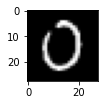

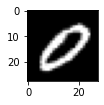

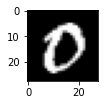

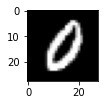

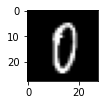

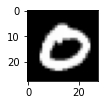

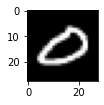

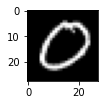

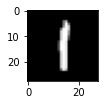

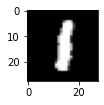

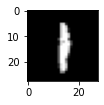

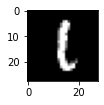

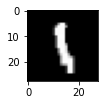

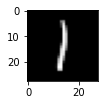

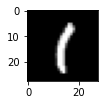

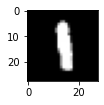

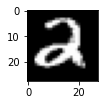

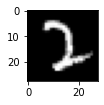

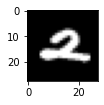

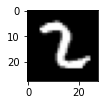

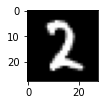

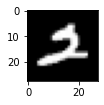

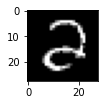

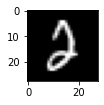

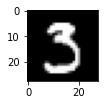

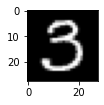

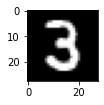

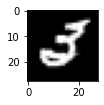

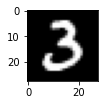

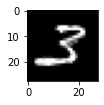

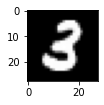

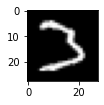

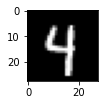

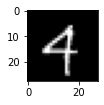

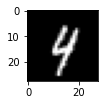

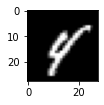

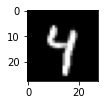

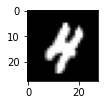

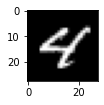

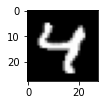

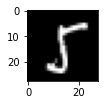

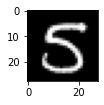

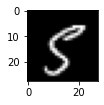

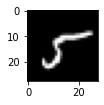

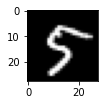

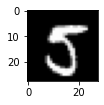

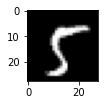

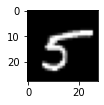

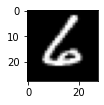

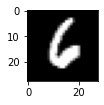

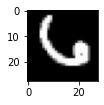

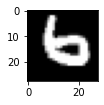

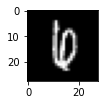

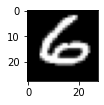

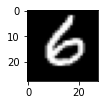

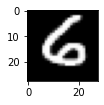

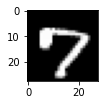

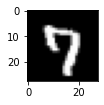

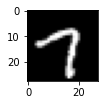

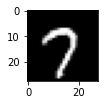

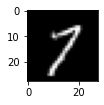

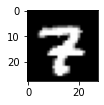

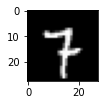

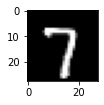

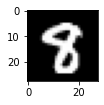

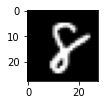

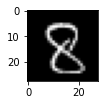

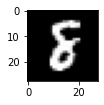

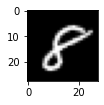

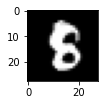

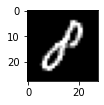

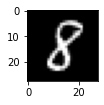

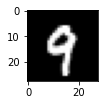

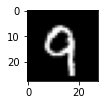

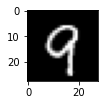

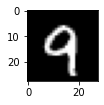

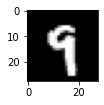

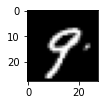

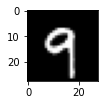

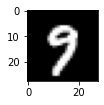

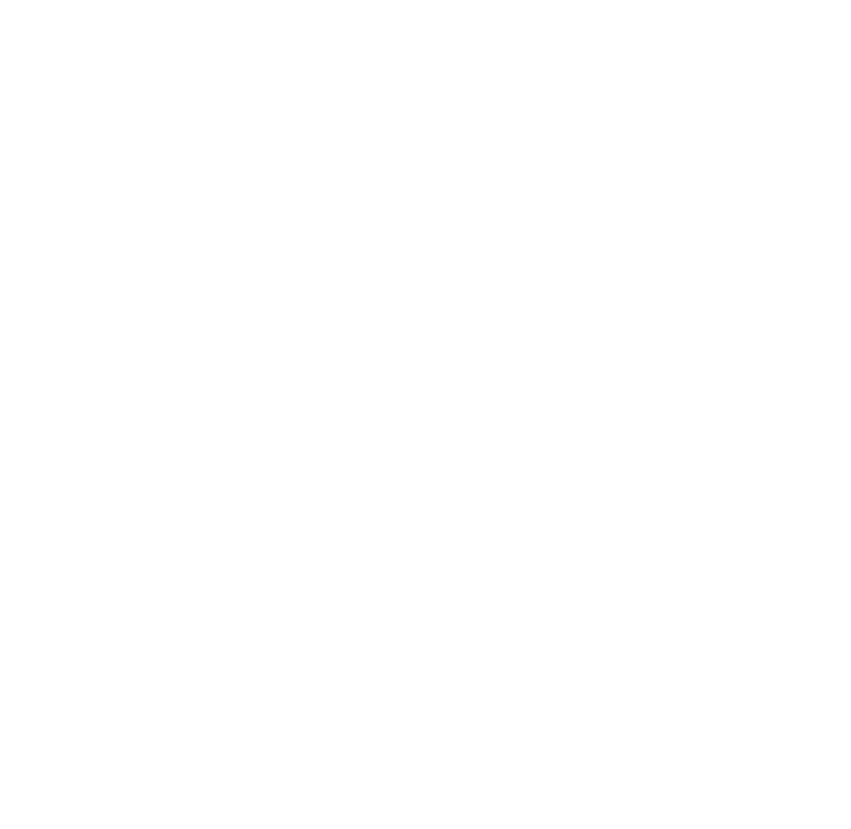

In [10]:
#Vamos a inpeccionar aleatoriamente el dataset, seperando las clases
def plot_mnist_grid():
    y_test=loader_test.dataset.targets
    x_test=loader_test.dataset.data
    samples = 8
    plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for label, example in enumerate(classes):
    #     random_idx = np.random.randint(0,len(mnist_test))
        plt_idxs = np.flatnonzero(y_test == label) # get all data equal to label
        plt_idxs = np.random.choice(plt_idxs, samples, replace=False) #muestrea samples muestras de plt_idx
    #     print(plt_idxs)
        for i, idx in enumerate(plt_idxs):
            plt_idx = i*len(classes) + label + 1 #plot index starts at 1
            plt.subplot(samples, len(classes), plt_idx)
    #         print(example, i, plt_idx)
    #         plt.imshow(x_test[idx].type(torch.float32).reshape(28,28))
    #         plt.axis('off')
            plot_number(x_test[idx])
            if i == 0:
                plt.title(example)

    plt.show()
plot_mnist_grid()

La imagen muestreada representa un: 2


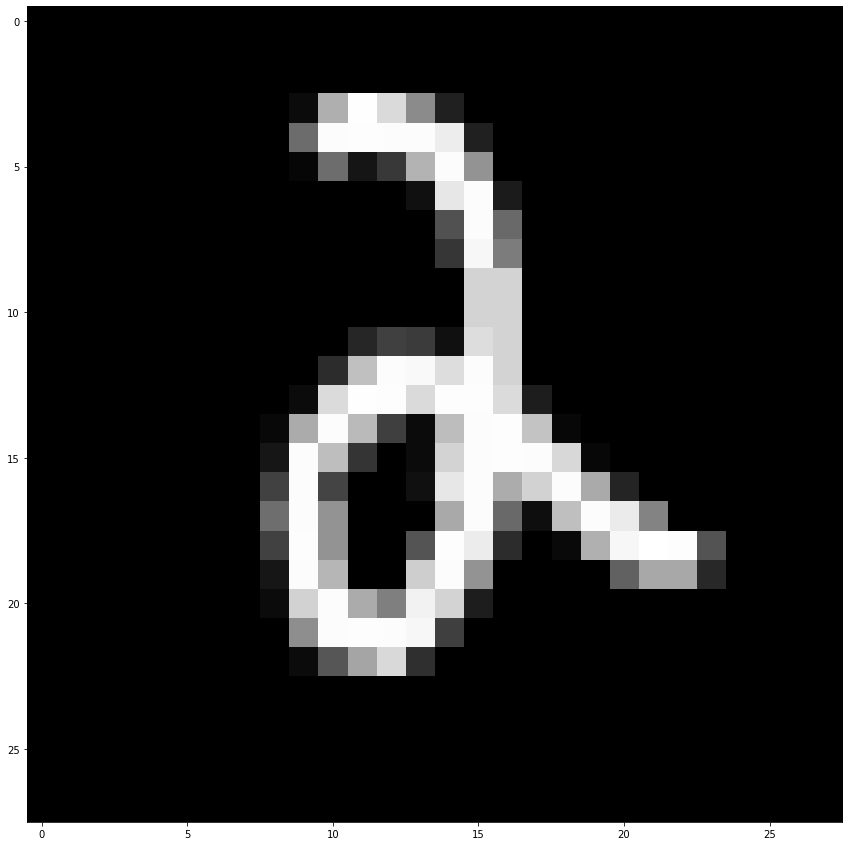

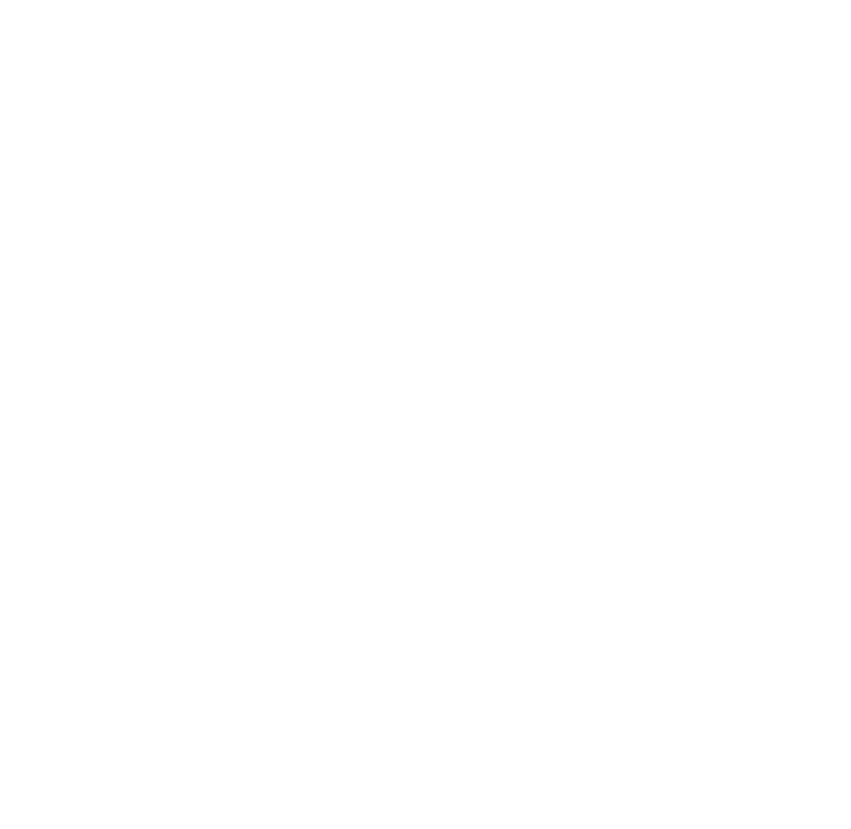

In [11]:
#Vamos a inpeccionar aleatoriamente una sola imagen del dataset
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx]}')
plot_number(x_test[rnd_idx])

## GPUs (Si tenemos GPU lo usaremos para acelerar el calculo)

In [12]:
dtype = torch.float32
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


## Compute Accuracy

In [13]:
#Este metodo lo usaremos mas adelante para medir la presicion de nuestra red neuronal
#Recibe como parametros un dataset "loader", un modelo de red neuronal "model" y un mode de funcionamiento "eval_mode"
def compute_acc(loader, model, eval_mode=False):
    num_correct = 0
    num_total = 0
    if eval_mode: model.eval()#Si es un modelo heredado de un modelo de pythorch se debe usar esto?
    
    #solo estamos evaluando no queremos que ese el calcule el gradiente de la funcion de costo dJ
    with torch.no_grad():#pythorch por defecto hace calculo de gradiente, pero en este caso lo desactivamos ya que no nos interesa
        for x, y in loader: #accedemos a los datos del dataset   x:imagenes, y:resultados esperado
            x = x.to(device=device, dtype=dtype) #esta instruccion pasa los datos al bus del GPU o CPU
            y = y.to(device=device, dtype=torch.long) #esta instruccion pasa los datos al bus del GPU o CPU
            scores = model(x) #probamos el dataset con el modelo de red neuronal                 
            _, pred = scores.max(1)    #Se aplica la funcion softmax    exp(salida) ?
            assert pred.shape == y.shape, 'Label shape and prediction shape does not match'
            #calculamos la probabilidad a  partir de  e^yi/sum(e^yi)
            num_correct += (pred==y).sum()  #valorEsperado*prediccion ,          predicccion is  -ln(softmax(outRed))
            num_total += pred.size(0)           
            
        return float(num_correct)/num_total

#OJO: en la ultima para los score no se le aplica una funcion de activacion 0_1, no se convierte a probabilidad de la ultima capa
#Para calcula el score o probabilidad de exito de cada neurona se utiliza la funcion SOFTMAX( e^xi/Sum e^xi)  )   
#   ojo   Loss function=   funcion de costo o error J es   =   para problemas de clasificacion se usa la 
# funcion de perdidad    "cross entropy"?  J= -ValorEsperado*ln( sofmax(prediccion) )    esto va de inf a 0(minimo global)

#Nota Funcion SOFTMAX: suaviza el valor de salida limitandolo de 0 a 1,  antes se usaba la funcion sigmode, atan, step) o de 0 a inf como  funciones ReLU o rampa      pero daban problemas de optimizacion?
#Aprendizado supervisado es cuando se entrena una red dando valores de entrada   y  dando valores de salida esperados

## MODO1) High level model  (creado una red usando la funcion nn.Sequential)

In [14]:
#Configuramos la red neuronal     input layer 784 neurons   -> intermediate layer of 1000 neurons , (activation function ReLU osea filtra solo valores +),  output layer of 10 neurons
#usaremos el dataset de validacion   "loader_test"  de 5000 imagenes
input_features = len(torch.flatten(x_test[0])) #28x28=784: caclulamos la longitud de entrada de la cadena de bits de una imagen 28x28   
hidden = 1000   #deseamos una red neuronal normal full connected  con 100 
num_classes = 10  

In [15]:
#Configuramos una red neuronal full connected de 2 capas
model1 = nn.Sequential(
    nn.Flatten(), #la entrada de la imagen 28x28 sera como cadena de pixels de 784
    nn.Linear(in_features=input_features, out_features=hidden ), #1st layer of 784 neurons con salida a 2nd layer 1000 neuros (simplemente es una multiplicacion matricial W.x ) 
    nn.ReLU(),  #PORQUE no se normaliza  de 0 a 1 ?   y  donde esta el softmax?
    nn.Linear(in_features=hidden, out_features=num_classes ) #2st layer of 1000 neurons con salida a 3nd layer 10 neurons (simplemente es una multiplicacion matricial W.x )
    #nn.ReLU(),  #NO se ele aplica    y  donde esta el softmax?
    )
#(simplemente es una multiplicacion matricial W2(ReLu(W1.input) )


In [16]:
def plot_loss(losses):  
    fig = plt.figure()
    f1 = fig.add_subplot()
    f1.set_ylabel("Cost")
    f1.set_xlabel("Epoch")
    f1.set_title("Cost vs Epoch")
    f1.plot(losses)
    plt.show()

#parametros: "model" sera model1 red full connected,  "optimizer" sera el tipo de solver,
#epoca: es la cantidad de iteraciones que la red pasa por todo el dataset de entrenamiento
# Como el dataset train es de 55 000 imagenes, entonces hay aprox 108 minibatches (107x512)
# osea en cada epoca la red   recorre   108 minibatches     
#Este metodo "train" siempre usara el dataset loader_train de 55 000 imagenes
def train(model, optimizer, epochs=100):
    model = model.to(device=device) #se pasa el model al gpu
    losses = [] #unused
    
    num_batches = len(loader_train)  #usamos el dataset loader_train de 55 000 imagenes
    for epoch in range(epochs):
        accum_loss = 0.
        for i, (x, y) in enumerate(loader_train):
            #poner modelo en modo de entrenamiento
            model.train()
            #mover a GPU
            x = x.to(device=device, dtype=dtype) 
            y = y.to(device=device, dtype=torch.long)
            
            #calcular scores
            scores=model(x)
            cost=F.cross_entropy(input=scores, target=y) #llamamos al grupo de funciones de pytorh  F, 
            #especificamente la funcion de perdida o costo   cross entropy  = sum(-desired*ln(softmax(outputs)))
            #cost es la funcion a minimizar,   target  es los valores deseados,  input  es la salida de la red?

            #calcular gradients           se  debe hallar el W  que mininima la funcion "cost"
            optimizer.zero_grad() #minimizamos usando el metodo del desenso de gradiente  dW=-learninrate*dCost
            cost.backward()  #TODO:  aplica retropropagacion? REVISAR         calcula los gradientes de toda la red

            #actualizar parametros
            optimizer.step()   # Wnew=Wold + dW
            
            #guardar pérdida
            accum_loss += cost.item()
        losses.append(accum_loss / num_batches)
            
        print(f'Epoch: {epoch}, loss: {cost.item()}, val accuracy: {compute_acc(loader_val, model, True)} ')
        print()
    plot_loss(losses)

Epoch: 0, loss: 1.9555771350860596, val accuracy: 0.7374 

Epoch: 1, loss: 1.4994101524353027, val accuracy: 0.801 

Epoch: 2, loss: 1.184092402458191, val accuracy: 0.844 

Epoch: 3, loss: 0.9974896311759949, val accuracy: 0.869 

Epoch: 4, loss: 0.790389895439148, val accuracy: 0.8816 

Epoch: 5, loss: 0.7179954051971436, val accuracy: 0.8898 

Epoch: 6, loss: 0.5225148797035217, val accuracy: 0.8962 

Epoch: 7, loss: 0.5628352761268616, val accuracy: 0.9008 

Epoch: 8, loss: 0.5407513380050659, val accuracy: 0.9038 

Epoch: 9, loss: 0.4795617461204529, val accuracy: 0.9062 



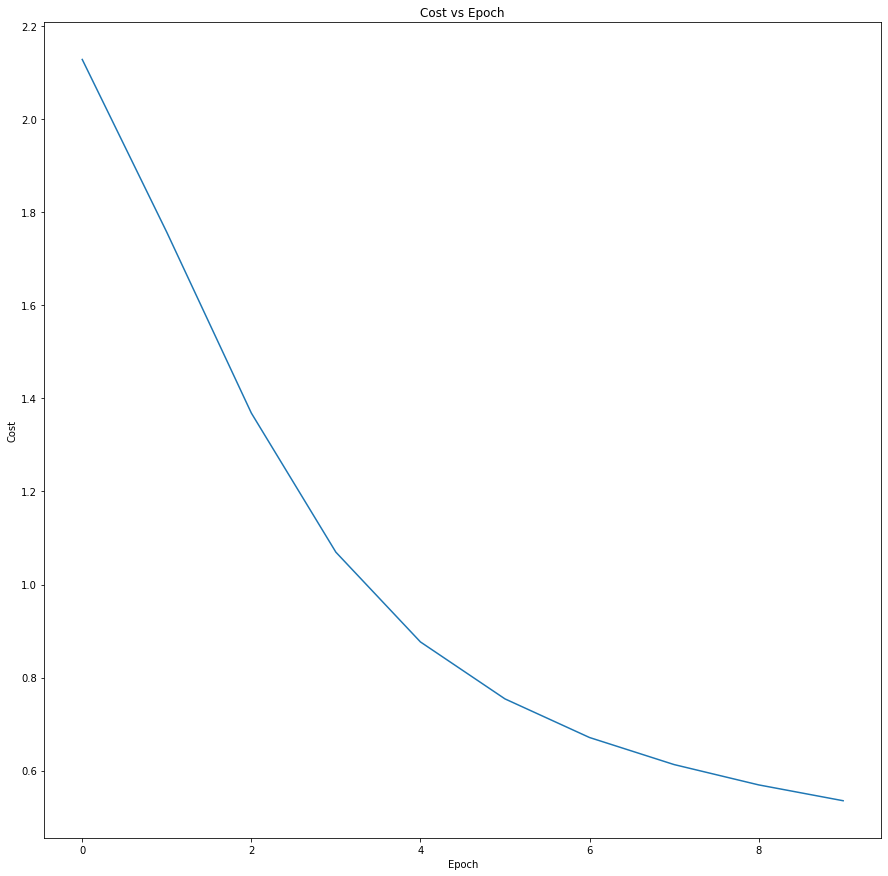

In [17]:
#entrenar el modelo
learning_rate = 1e-2
epochs = 10
optimiser = torch.optim.SGD(model1.parameters(), lr=learning_rate)
train(model1, optimiser, epochs) #aqui se entrena siempre usando el dataset loader_train de 55 000 imagenes

## MODO2) More elegant high level model (Creando modelo de red heredando de la clase de pytorch)

En este modo, la red neuronal es una variable miembro de una subclase que hereda de una clase de pytorch.
Usar este modo de herencia tiene sus ventajas :
- permite guardar el modelo mas facil
- dice que da mas flexibilidad para structurar la red???  en todo caso se recomienda (seguramente la ventaja es porque te permite heredar otras funcionalidades utiles de la super clase que brinda pythoch, habra que averiguar)

In [18]:
#Sub clase FC_model          ,  super clase  nn.Module
class FC_model(nn.Module):
    #constructor
    def __init__(self, input_features, hidden = 1000, num_classes=10):
        super().__init__()
        #inicializamos variables miembro,  la red neuronal sera una varaible miembro     
        self.model = nn.Sequential(
          nn.Flatten(), #la entrada de la imagen 28x28 sera como cadena de pixels de 784
          nn.Linear(in_features=input_features, out_features=hidden ), #1st layer of 784 neurons con salida a 2nd layer 1000 neuros (simplemente es una multiplicacion matricial W.x ) 
          nn.ReLU(),  #PORQUE no se normaliza  de 0 a 1 ?   y  donde esta el softmax?
          nn.Linear(in_features=hidden, out_features=num_classes ) #2st layer of 1000 neurons con salida a 3nd layer 10 neurons (simplemente es una multiplicacion matricial W.x )
          #nn.ReLU(),  #NO se ele aplica    y  donde esta el softmax?
          )
    #dice que esta funcion "forward" es una funcion que se ejecuta cuando se instancia la clase (similar a los functores ) 
    def forward(self, x): #similar al operador de python  __call__   para functores   ,  parece un callback  funcion que se le pasa a otra funcion?
        return self.model(x) #None

Epoch: 0, loss: 0.25088202953338623, val accuracy: 0.9678 

Epoch: 1, loss: 0.10957656055688858, val accuracy: 0.9734 

Epoch: 2, loss: 0.077447310090065, val accuracy: 0.9732 

Epoch: 3, loss: 0.052442170679569244, val accuracy: 0.9798 

Epoch: 4, loss: 0.04521699249744415, val accuracy: 0.978 

Epoch: 5, loss: 0.05011006072163582, val accuracy: 0.9804 

Epoch: 6, loss: 0.004321979358792305, val accuracy: 0.9766 

Epoch: 7, loss: 0.012763221748173237, val accuracy: 0.978 

Epoch: 8, loss: 0.0184861458837986, val accuracy: 0.9798 

Epoch: 9, loss: 0.037090666592121124, val accuracy: 0.9818 



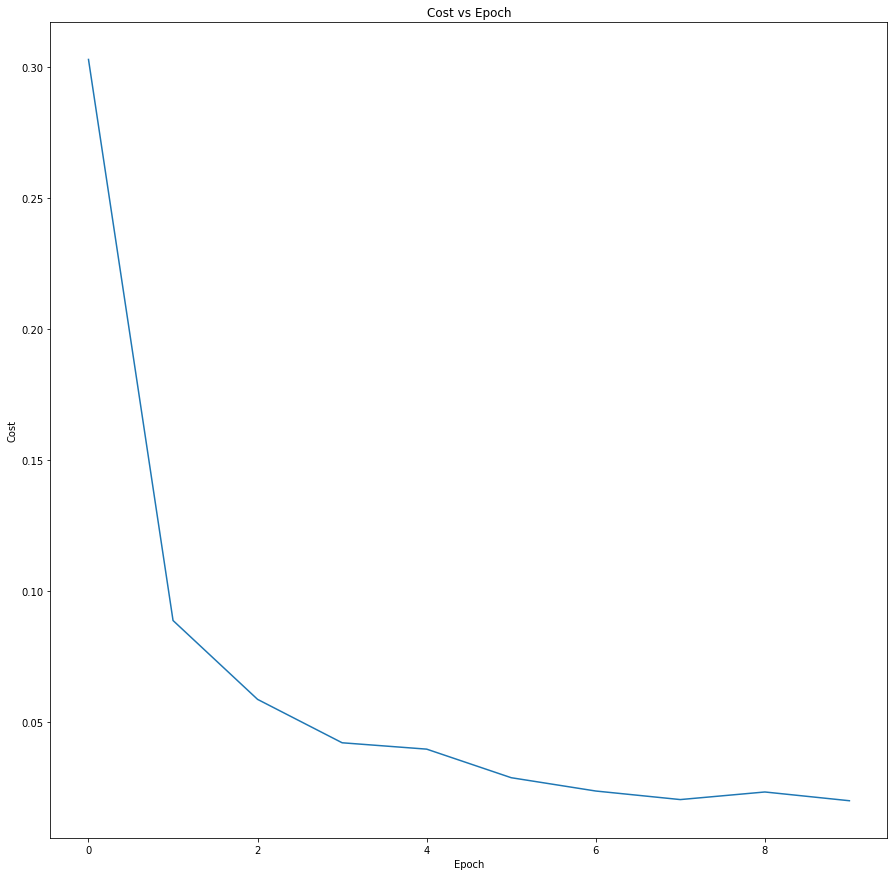

In [19]:
#Entrenar modelo
input_features = len(torch.flatten(x_test[0]))
hidden = 1000
num_classes = 10
learning_rate = 1e-2   # probar con un paso menor de 1e-4
epochs = 10
model2 = FC_model(input_features) #input_features esta relacionado siempre al dataset de validadcion loader_test de 10 000 imagens
optimiser = torch.optim.Adam(model2.parameters(), lr = learning_rate) #el metodo de optimizacion Adam es mas eficiente para que la minimizacion converga rapido (la comunidad lo recomienda )
# optimiser = torch.optim.SGD(model2.parameters(), lr = learning_rate) #este es el optimizer que usar el metodo del SDG (decenso de gradiente   stocastic gradient descent) pero no es el mas eficiente
train(model2, optimiser, epochs)   #aqui se entrena siempre usando el dataset loader_train de 55 000 imagenes

In [20]:
compute_acc(loader_test, model2)

0.9789

## Guardando el modelo

In [21]:
model_path = '/media/josh/MyData/Databases/mnist/FC_model1st.pth'
torch.save(model2.state_dict(), model_path)   #verificar que se guardo el modelo de red

Cargamos el modelo guardado

In [33]:
#input_features esta relacionado siempre al dataset de validadcion loader_test de 10 000 imagens
input_features = len(torch.flatten(x_test[0]))
loaded_model = FC_model(input_features=input_features) 
loaded_model.load_state_dict(torch.load(model_path)) #CARGAMOS el MODELO DE RED guardado
loaded_model = loaded_model.to(device=device)#pasamos el modelo al gpu
#Se asume que la red ya esta entrenada y validada  asi que evaluamos/predecimos directamente  con el set de loader_test de 5000 imagens
loaded_model.eval() #este es un metodo heredado  que  evalua la red directamente

FC_model(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1000, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1000, out_features=10, bias=True)
  )
)

In [34]:
#Metodo que brinda una imagen aleatorio del set de loader_test de 10 000 imagenes 
def sample_number():
    rnd_idx = np.random.randint(10000)
#     print(f'{y_test[rnd_idx]}')
    image2 = x_test[rnd_idx][None, :,:]
    plot_number(image2)
    image2 = image2.type(torch.float32)
    return image2.to(device=device)

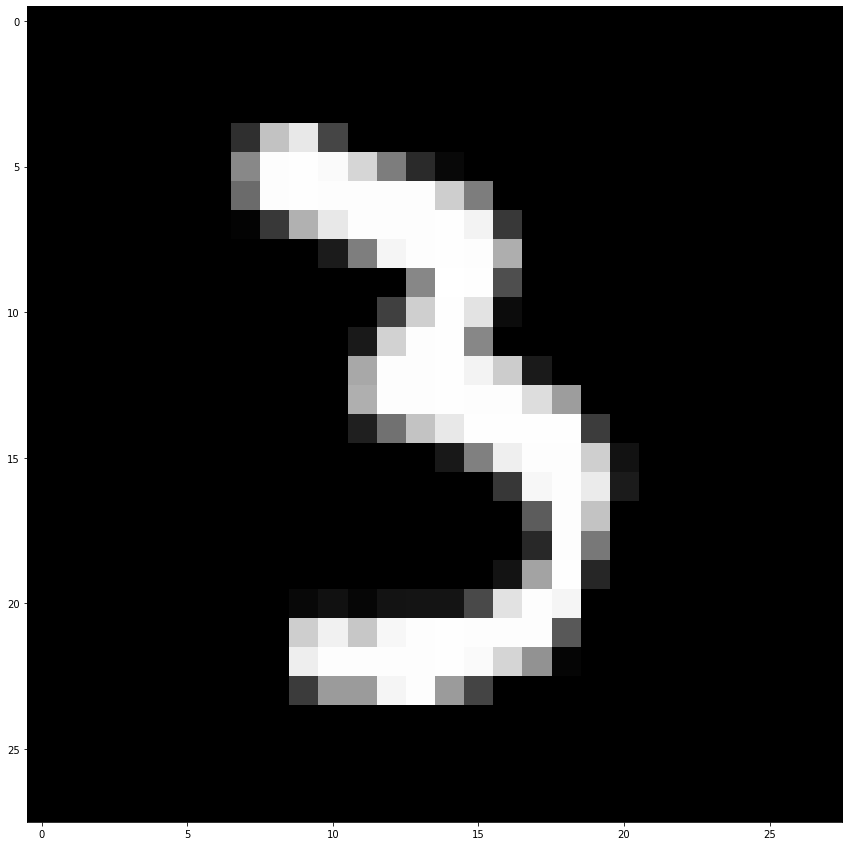

The predicted class is: 3


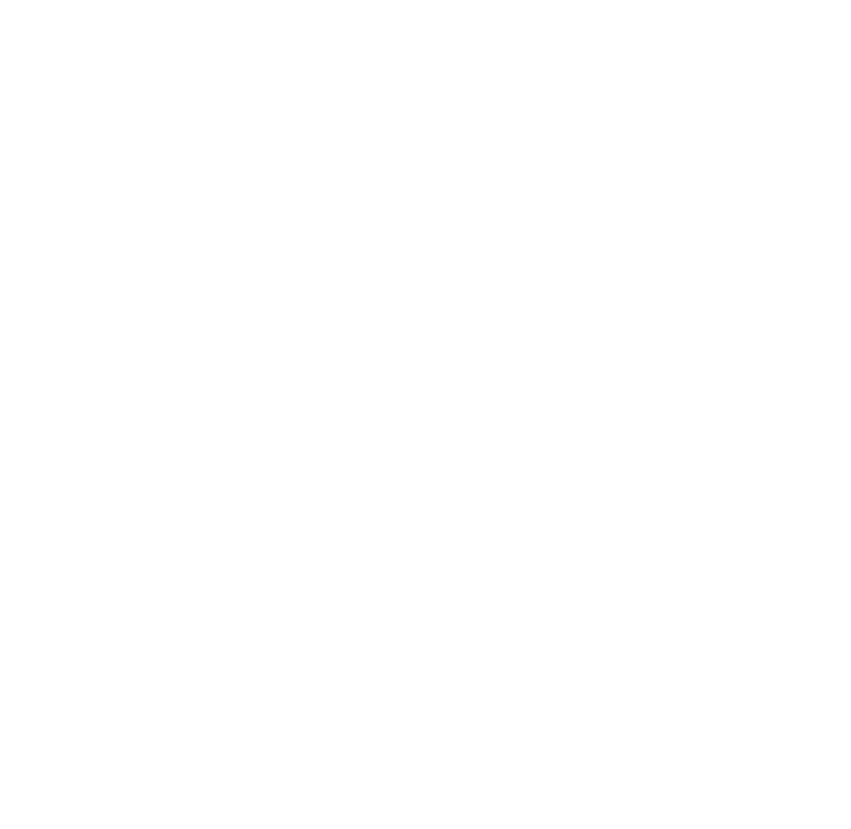

In [38]:
image=sample_number()
_, class_is = loaded_model(image).max(1)
print(f'The predicted class is: {class_is[0]}')

## MODO3)  Red Neuronal con módulos básicos   (creando red desde casi 0 usando  numpy lib  con unas pocas funciones  de  pythorch)

In [26]:
def flatten(x):
    N = x.shape[0]
    return x.view(N, -1)

In [63]:
class FC_other():
    def __init__(self, in_features, hidden=1000, num_classes = 10):
        #inicializamos varaibles miembros
        #Coefficientes de la primera capa de neuronas
        self.W1=torch.randn((in_features,hidden), device=device, dtype=dtype) #usamos pytorch para crear matriz W aleatoria  
        self.W1.requires_grad=True
        self.b1=torch.zeros((hidden), device=device, dtype=dtype)
        self.b1.requires_grad=True
        
        #Coefficientes de la segunda capa de neuronas
        self.W2=torch.randn((hidden,num_classes), device=device, dtype=dtype) #usamos pytorch para crear matriz W aleatoria  
        self.W2.requires_grad=True
        self.b2=torch.zeros((num_classes), device=device, dtype=dtype)
        self.b2.requires_grad=True

    #def forward(self, x):   #es como un functor   un funcion  que se llama automaticamente cuando   se instancia  una clase 
    def __call__(self, x):  #operator of functor in c++
        x=flatten(x)
        x=x@self.W1+self.b1 # @ multiplicacion matriz vector
        x=F.relu(x)
        return x@self.W2+self.b2

                

In [59]:
sample1 = x_test[0][None, :, :].to(device=device, dtype=dtype)

In [60]:
input_features # 

784

In [64]:
hidden = 1000
num_classes = 10
model3 = FC_other(input_features, hidden, num_classes)
print(model3(sample1).shape)  # llama automaticamente al operator  __call__
#print(model3.forward(sample1).shape) 

torch.Size([1, 10])


In [65]:
def train_loop(model, epochs=10, learning_rate = 1e-6):
#     model = model.to(device=device)
    losses = []
    num_batches = len(loader_train)
    for epoch in range(epochs):
        acum_loss = 0.
        for it, (x, y) in enumerate(loader_train):
            #Move to selected device
            x=x.to(device=device, dtype=dtype)
            y=y.to(device=device, dtype=torch.long)
#             print(x.shape)
            #compute scores
#             scores = model.forward(x)
            scores = model(x)
            #compute cost
            cost = F.cross_entropy(input=scores, target=y)
            #compute gradient
            cost.backward()
            
            #update parameters
            with torch.no_grad():
                model.W1 -= learning_rate * model.W1.grad
                model.b1 -= learning_rate * model.b1.grad
                
                model.W2 -= learning_rate * model.W2.grad
                model.b2 -= learning_rate * model.b2.grad
                
                #zero grads
                model.W1.grad.zero_()
                model.b1.grad.zero_()
                model.W2.grad.zero_()
                model.b2.grad.zero_()            
            
            acum_loss += cost.item()
        losses.append(acum_loss/num_batches)
        print(f'Epoch: {epoch}, loss: {cost.item()}, val accuracy: {compute_acc(loader_val, model)} ')
        print()
            

In [66]:
learning_rate = 1e-2
epochs = 20
hidden = 1000
num_classes = 10
model_fc1 = FC_other(input_features, hidden, num_classes)
# print(model_fc1.forward(x1).shape)

train_loop(model_fc1, epochs, learning_rate)  

Epoch: 0, loss: 31.91474151611328, val accuracy: 0.7566 

Epoch: 1, loss: 18.780807495117188, val accuracy: 0.8204 

Epoch: 2, loss: 20.295015335083008, val accuracy: 0.8468 

Epoch: 3, loss: 14.245709419250488, val accuracy: 0.8602 

Epoch: 4, loss: 13.694014549255371, val accuracy: 0.8694 

Epoch: 5, loss: 11.266538619995117, val accuracy: 0.877 

Epoch: 6, loss: 10.972414016723633, val accuracy: 0.8814 

Epoch: 7, loss: 12.396562576293945, val accuracy: 0.887 

Epoch: 8, loss: 9.159987449645996, val accuracy: 0.8886 

Epoch: 9, loss: 9.43649959564209, val accuracy: 0.894 

Epoch: 10, loss: 3.3109958171844482, val accuracy: 0.8976 

Epoch: 11, loss: 8.492722511291504, val accuracy: 0.9018 

Epoch: 12, loss: 7.128032684326172, val accuracy: 0.9014 

Epoch: 13, loss: 8.5635986328125, val accuracy: 0.9042 

Epoch: 14, loss: 8.893948554992676, val accuracy: 0.9058 

Epoch: 15, loss: 6.937857627868652, val accuracy: 0.9102 

Epoch: 16, loss: 9.380420684814453, val accuracy: 0.909 

Epoch:

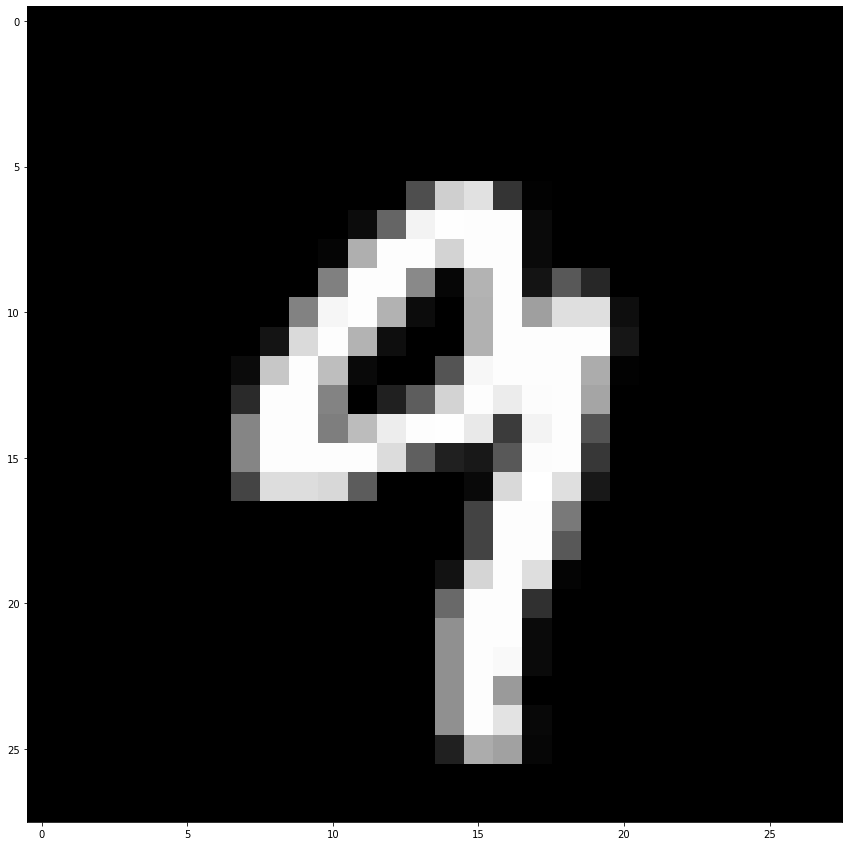

The predicted class is: 9


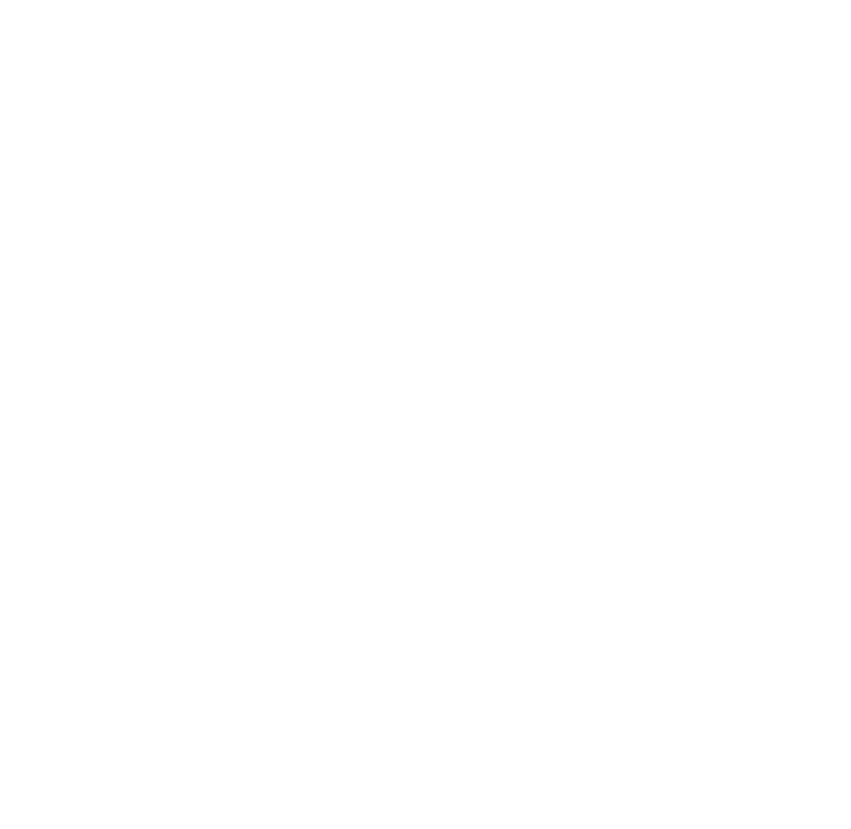

In [68]:
#Probamos este modelo
imageTest=sample_number()
_, class_is = model_fc1(imageTest).max(1)
print(f'The predicted class is: {class_is[0]}')